# Multiple Linear Regression Synthetic

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import f

## 1.0 Generate Synthetic Data

In [2]:
n = 100
p = 5
sigma = 1
beta = np.array([2, -1, 3, -2, 0])
X = np.random.uniform(size = (n, p))

# Create observation by adding error term
y = X @ beta + sigma * np.random.standard_normal(size = (n))

## 2.0 Get estimators

$$\large \hat \beta = (X^{T} X)^{-1}X^T y $$

In [3]:
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
beta_hat

array([ 1.59060945, -1.41004882,  3.23308867, -1.78793554,  0.22677789])

## 3.0 Residuals

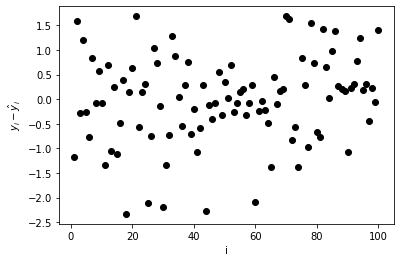

In [4]:
ei = y - X @ beta_hat
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.set_xlabel('i')
ax.set_ylabel(r'$y_i - \hat y_i$')
ax.scatter(range(1,len(ei)+1), ei, color = 'black')  # Plot some data on the axes

### 3.1 Sum of Squares

$$\large \hat \epsilon = y_i - \hat y_i$$

$$\large \hat \epsilon = (I - H) y$$

$$\large H = X (X^T X)^{-1} X^T$$

$$\large \hat \epsilon'\hat \epsilon = y'(I - H) y$$

Option 1:

In [5]:
ei = y - X @ beta_hat
SS = np.dot(ei, ei)
SS

79.5879331800288

Option 2:

In [6]:
def get_H_matrix(X):
    return X @ np.linalg.inv(X.T @ X) @ X.T

H_full = get_H_matrix(X)
SS_full = y.T @ (np.identity(H_full.shape[0]) - H_full) @ y
SS_full

79.5879331800289

## 4.0 Testing $ \beta_5 = 0 $

Compute Residual sum of squares

In [7]:
X_red = X[:, :-1]
H_red = get_H_matrix(X_red)
SS_red = y.T @ (np.identity(H_red.shape[0]) - H_red) @ y
SS_red

79.9806641307161

Compute F-statistic

In [8]:
n = X.shape[0]
p = X.shape[1]
q = X_red.shape[1] 
F_stat = ((SS_red - SS_full) / (p-q)) / (SS_full/(n-p))
F_stat

0.4687826260155431

F statistic appeared to change  a lot in a few iterations. Thus, I decided to look at the distribution of the F statistic.

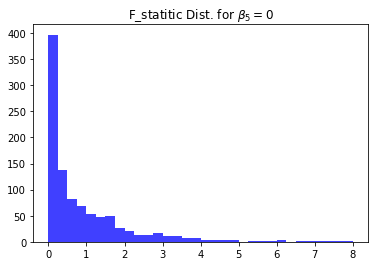

In [9]:
n = 100
p = 5
sigma = 1
beta = np.array([2, -1, 3, -2, 0])

F_sample = []
for _ in range(1000):

    X = np.random.uniform(size = (n, p))
    y = X @ beta + sigma * np.random.standard_normal(size = (n))
    
    # Full model
    H_full = get_H_matrix(X)
    SS_full = y.T @ (np.identity(H_full.shape[0]) - H_full) @ y
    
    # Reduced Model
    X_red = X[:, :-1]
    H_red = get_H_matrix(X_red)
    SS_red = y.T @ (np.identity(H_red.shape[0]) - H_red) @ y
    
    F_stat = ((SS_red - SS_full) / (p-q)) / (SS_full/(n-p))
    
    F_sample.append(F_stat)
    
fig, ax = plt.subplots(1, 1)
bins = np.arange(0, 8+0.1, 0.25)
_, bins, patches = plt.hist(F_sample, bins = bins, facecolor='b', alpha=0.75)
plt.title(r'F_statitic Dist. for $\beta_5 = 0$')
plt.show()

From histogram, calculate mean of first bin

In [10]:
f_distribution = np.array(F_sample)
np.median(f_distribution[f_distribution<=0.25])

0.052162289061954095

In [11]:
f_statistic = f.isf(0.05,p-q,n-p)
f_statistic

3.9412215469195755

$$F_{1, 95} < F_{\alpha = 0.05, 1, 95}
$$

$$ 0.052 < 3.941
$$

We fail to reject $H_o$, thus, the $\beta_5 = 0$ is supported by the data (which should be case).

## 5.0 Testing $ \beta_1 = 0 $

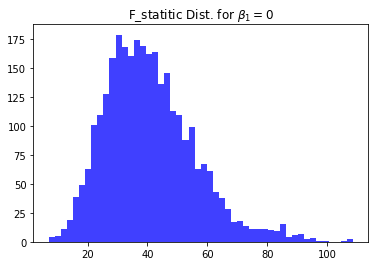

In [12]:
n = 100
p = 5
sigma = 1
beta = np.array([2, -1, 3, -2, 0])

F_sample = []
for _ in range(3000):

    X = np.random.uniform(size = (n, p))
    y = X @ beta + sigma * np.random.standard_normal(size = (n))
    
    # Full model
    H_full = get_H_matrix(X)
    SS_full = y.T @ (np.identity(H_full.shape[0]) - H_full) @ y
    
    # Reduced Model
    X_red = X[:, 1:]
    H_red = get_H_matrix(X_red)
    SS_red = y.T @ (np.identity(H_red.shape[0]) - H_red) @ y
    
    F_stat = ((SS_red - SS_full) / (p-q)) / (SS_full/(n-p))
    
    F_sample.append(F_stat)
    
fig, ax = plt.subplots(1, 1)
_, bins, patches = plt.hist(F_sample, bins = 50, facecolor='b', alpha=0.75)
plt.title(r'F_statitic Dist. for $\beta_1 = 0$')
plt.show()

In [13]:
f_distribution = np.array(F_sample)

$$ F > 3.941
$$

This would lead to a rejection of the hypothesis at the 0.05 level of significance. $\beta_1$ is not zero.

## 6.0 Testing $ \beta_5 = 0 $ using a T distribution

We can also test for a single $\hat \beta_j$  to be $0$ using the marginal distribution for $\hat \beta_j$.

In [24]:
n = 100
p = 5
sigma = 1
beta = np.array([2, -1, 3, -2, 0])
X = np.random.uniform(size = (n, p))

# Create observation by adding error term
y = X @ beta + sigma * np.random.standard_normal(size = (n))
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
beta_hat

array([ 2.1349051 , -0.98707836,  2.84309937, -2.07741058,  0.02923366])

Covariance Matrix

In [25]:
# Covariance as a function of sigma^2
COV_beta_hat = np.linalg.inv(X.T @ X)
COV_beta_hat

array([[ 0.11019652, -0.02695449, -0.03850592, -0.01749097, -0.00761483],
       [-0.02695449,  0.10508705, -0.01612712, -0.02327797, -0.03643402],
       [-0.03850592, -0.01612712,  0.0993036 , -0.01797559, -0.02584844],
       [-0.01749097, -0.02327797, -0.01797559,  0.08598478, -0.01607432],
       [-0.00761483, -0.03643402, -0.02584844, -0.01607432,  0.09134412]])

Esimate $\sigma^2$

$$\large \sigma^2 = \dfrac{1}{n-p} \hat \epsilon'\hat \epsilon$$

In [26]:
ei = y - X @ beta_hat
SS = np.dot(ei, ei)
SS

104.15788305887253

In [27]:
b5 = beta_hat[-1]
b_null = 0
alpha = 0.05
sigma_2 = SS / ( n-p) 
t = (b5 - b_null) / np.sqrt(COV_beta_hat[-1,-1] * sigma_2 )
abs(t)

0.09237587559603301

In [18]:
#Critical T-value
abs(stats.t.isf(  (1-alpha/2), df = 95))

1.9852510034099262

$$ T _{critical} > T_{stat}
$$

$$ 1.985 > 0.09 \text{ Do not Reject } H_o
$$

In [28]:
p = 2 * (1 - stats.t.cdf(abs(t), df = 95))
p

0.9265939283810272

$$ p > alpha \text{ Do not Reject } H_o
$$